In [3]:
from SourceCode.GalerkinEllipticEq import GalerkinEllipticSolver
from SourceCode.utilities import get_max_error
from SourceCode.Domain import OneDimDomain, TwoDimDomain
import numpy as np
from math import pi, e#, sin
from numpy import sin

# №1 #

$$ y'-y=0 $$
$$ y(0)=1$$

In [10]:
n_fs = 6
funcs = ["x**{}".format(i + 1) for i in range(n_fs)]
left_part = lambda x, func: func(x, derivative="x") - func(x)
right_part = lambda x: 0
left_b = 0
right_b = 1
variables = ["x"]
domain = OneDimDomain(left_b, right_b)
obj = GalerkinEllipticSolver(
    funcs, variables, left_part, right_part, domain, border_func="1"
)
obj.calculate_solution()
f_approx = obj.get_solution()
print("coeffs: {}".format(obj.solution))
n_points = 100
dom_vals = domain.get_domain_values(n_points)
true_sol = lambda x: np.exp(x)
error = get_max_error(true_sol, f_approx, dom_vals)
print("max error {}".format(error))

coeffs: [0.99999019 0.50011279 0.1661158  0.04300012 0.00665808 0.00240431]
max error 5.440880910256851e-07


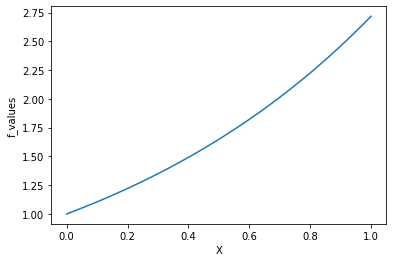

In [11]:
domain.plot_function(f_approx)

In [5]:
# min_to_print = 10
# for i in range(min(n_points, min_to_print)):
#     print("x: {:.4f} appr: {:.4f} true: {:.4f}".format(dom_vals[i], f(dom_vals[i]), np.exp(dom_vals[i])))

# № 2

$$ f_{yy} + f_{xx} = -1 $$
$$ f(-1,y)=f(1,y)=f(x,-1)=f(x,1)=0 $$

In [6]:
def true_solution(x, y):
        n: int = 100
        total_s: float = 0
        for i in range(1, n, 2):
            for j in range(1, n, 2):
                total_s += (
                    (-1) ** ((i + j) // 2 - 1)
                    / (i * j * (i * i + j * j))
                    * np.cos(i * pi / 2 * x)
                    * np.cos(j * pi / 2 * y)
                )
        total_s = total_s * (8 / (pi * pi)) ** 2
        return total_s

In [8]:
n_fs = 5
# funcs = ["cos({}*pi/2*x)*cos({}*pi/2*y)".format(i, j) for i in range(1, n_fs, 2) for j in range(1, n_fs, 2)]
funcs = [
    "(1-x*x)**{}*(1-y*y)**{}".format(i, j)
    for i in range(1, n_fs, 2)
    for j in range(1, n_fs, 2)
]
variables = ["x", "y"]
left_part = lambda x, y, func: func(x, y, derivative="xx") + func(
    x, y, derivative="yy"
)
right_part = lambda x, y: -1
domain = TwoDimDomain(-1, 1, -1, 1)
obj = GalerkinEllipticSolver(funcs, variables, left_part, right_part, domain)
obj.calculate_solution()
f_approx = obj.get_solution()
n_points = 100
dom_vals = domain.get_domain_values(n_points)
error = get_max_error(true_solution, f_approx, *dom_vals)
print("error {}".format(error))

error 0.0036022219668757835


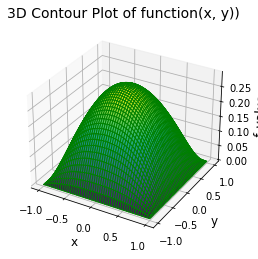

In [9]:
domain.plot_function(f_approx)

# №3

$$ u_{xx}+0.2u_x+u=-0.2exp(-x/5)cos(x) $$
$$u(0)=0$$
$$u(1)=sin(1)exp(-0.2)$$
$$analyt\_sol=exp(-x/5)sin(x)$$

In [27]:
n_fs = 10
funcs = ["(1-x)*x**{}".format(i + 1) for i in range(n_fs)]
variables = ["x"]
left_part = lambda x, func: (func(x, derivative='xx') + 0.2*func(x, derivative='x')+func(x))
right_part = lambda x: -0.2*np.exp(-x/5)*np.cos(x)
left_b = 0
right_b = 1
domain = OneDimDomain(left_b, right_b)
obj = GalerkinEllipticSolver(
        funcs, variables, left_part, right_part, domain, border_func="x*sin(1)*exp(-0.2)"
    )
obj.calculate_solution()
f = obj.get_solution()
N = 100
domain_vals = domain.get_domain_values(N)
true_sol = lambda x: np.exp(-x/5)*np.sin(x)
error = get_max_error(true_sol, f, domain_vals)
print("max abs error {}".format(error))

max abs error 1.0119682869458302e-13


# № 4

$$ u_{xx}-x^2u=-(\pi^2/4+xx)cos(x\pi/2) $$
$$ u(0)=1 $$
$$ u(1)=0 $$
$$ analyt = cos(x\pi/2) $$

In [26]:
n_fs = 6
funcs = ["(1-x)*x**{}".format(i + 1) for i in range(n_fs)]
variables = ["x"]
left_part = lambda x, func: func(x, derivative='xx') - x*x*func(x)
right_part = lambda x: -(pi*pi/4+x*x)*np.cos(x*pi/2)
left_b = 0
right_b = 1
domain = OneDimDomain(left_b, right_b)
obj = GalerkinEllipticSolver(
        funcs, variables, left_part, right_part, domain, border_func="1-x"
    )
obj.calculate_solution()
f = obj.get_solution()
print("coeffs: {}".format(obj.solution))
n_points = 100
dom_vals = domain.get_domain_values(n_points)
true_sol = lambda x: np.cos(x*pi/2)
error = get_max_error(true_sol, f, dom_vals)
print("max error {}".format(error))

coeffs: [ 1.00000156 -0.2337433  -0.233338    0.01860651  0.02251407 -0.00324311]
max error 2.9128102374542664e-08


# № 5

$$ y''-y = 0 $$
$$ y(0)=0 $$
$$ y(1)=1 $$
$$ true\_sol = \frac{e}{e*e-1}e^x+\frac{e}{1-e*e}e^{-x} $$

In [25]:
n_fs = 8
funcs = ["(1-x)*x**{}".format(i + 1) for i in range(n_fs)]
variables = ["x"]
left_part = lambda x, func: func(x, derivative="xx") - func(x)
right_part = lambda x: 0
left_b = 0
right_b = 1
domain = OneDimDomain(left_b, right_b)
obj = GalerkinEllipticSolver(
        funcs, variables, left_part, right_part, domain, border_func="x"
    )
obj.calculate_solution()
f = obj.get_solution()
print("coeffs: {}".format(obj.solution))
n_points = 100
dom_vals = domain.get_domain_values(n_points)
true_sol = lambda x: e/(e*e-1)*np.exp(x) + e/(1-e*e)*np.exp(-x)
error = get_max_error(true_sol, f, dom_vals)
print("max error {}".format(error))

coeffs: [-1.49081872e-01 -1.49081873e-01 -7.26216930e-03 -7.26227499e-03
 -1.70891291e-04 -1.71782482e-04 -1.76066507e-06 -2.66219724e-06]
max error 3.448352714485736e-13
